In [22]:
using Plots
using Random
using LinearAlgebra

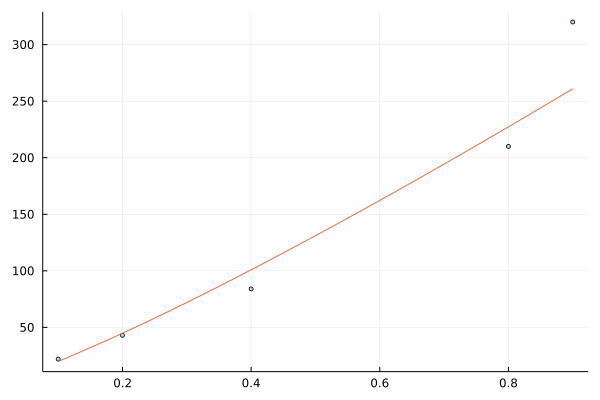

In [73]:
#EXERCICIO 1
#Pontos x e y dados
x = [0.1;0.2;0.4;0.8;0.9]
y = [22; 43;84;210;320]

#Troca de variáveis “indo para mundo linear”
x_barra=log.(x)
y_barra=log.(y)
 
#Função que recebe um conjunto de números x e y e o grau do polinômio que desejado e cria a matriz de vandermonde dele
function vandermonde(x,y,grau)
#Recebendo o tamanho do vetor x
n,=size(y)
#Criando uma matriz zerada do tamanho desejado
V=zeros(n,grau+1)
#Looping que vai até o número de linhas da matriz
    for i=1:n
#Looping que vai até o número de colunas desejadas na matriz (grau da #matriz + 1)
     for j=1:(grau+1)
#Criando ponto a ponto da matriz (posição atual x elevado a j-1)
        V[i,j]=x[i]^(j-1)
        end
    end
#Retorna a matriz desejada
    return V
end
 
#Função que realiza a regressão dado um conjunto de pontos e o grau de #polinômio
function regressão(x,y,grau)
#Chama a função de vondermonte para criar a matriz
V=vandermonde(x,y,grau)
#Resolvendo o sistema: quando o sistema a ser resolvido não é possível
#de ser resolvido, o contra barra  do Julia já disponibiliza a solução
#pelo método dos mínimos quadrados*
c=V\y
return c #Retorna os coeficientes do polinômio
end
 
#Realizando a regressão para encontrar os coeficientes c1 e c2 do polinômio
c_barra = regressão(x_barra,y_barra,1)
 
#Criando o polinômio y_barra = c1_barra + x_barra*c2_barra passando os #coeficientes encontrados
reta_barra(x)= c_barra[1]+c_barra[2]*x
 
#Voltando para a função do problema e encontrando os valores dos coeficientes desta função
c1=exp(c_barra[1])
c2=c_barra[2]
 
#Retornando o modelo anterior
funcao(x)=c1*(x^c2)
 
#Plotando os pontos dados
scatter(x, y, c=:lightblue, ms=3, leg=false)
#Plotando o gráfico da função
plot!(funcao)


In [24]:
round(funcao(0.3), digits=3)


72.061

In [98]:
#EXERCICIO 2.(a) 
#Pontos x e y
x = [0;10;15;20;32;59;62;125]
y = [0;185;319;447;742;1325;1445;4151]
    
#Função que recebe os pontos x e y e o grau desejado e realiza a interpolação dos #pontos dados
function interpolação(x,y,grau)
    #Cria uma matriz de vondermonde com os pontos dados
    V = vandermonde(x,y,grau)
    #Resolve o sistema 
    a = V\y
    #Cria a função com os coeficientes encontrados pelo sistema anterior
    f(x) =sum(a[i+1]*x^i for i in 0:grau)
    #Retorna a função criada
    return f
end

#Função que calcula a integral f(x) num intervalo a até b, passando a quantidade de intervalos de integração
function trapezio(f,a,b,n) 
    #Pegando o tamanho de cada intervalo de integração
    h = (b-a)/n
    #Criando uma variável que irá guardar o valor da integral (area do trapezio)
    S=0.0
    for i=1:(n-1)  #Lopping for que calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    #Calculando as “pontas”
    S=h/2*(S+f(a)+f(b)) 
    #Retorna a área (valor da integral)
    return S
end
    
#Função que recebe os pontos x e y 
function integrando(x,y)
    #Variável que guarda o valor do somatório das áreas dos trapézios 
    somatorio = 0.0
    #Lopping que realiza a interpolação e a soma das áreas (temos 7 pares de pontos - logo temos 7 funções e 7 áreas)
    for i=1:7
         #Realizando a interpolação
        polinomio = interpolação(x[i:i+1],y[i:i+1],1)
        #Realizando o somatório das áreas
        somatorio = somatorio + trapezio(polinomio,x[i],x[i+1],1)
    end
        #Retornando o somatório dos trapézios  
    return somatorio
end

integrando(x,y)

219567.5

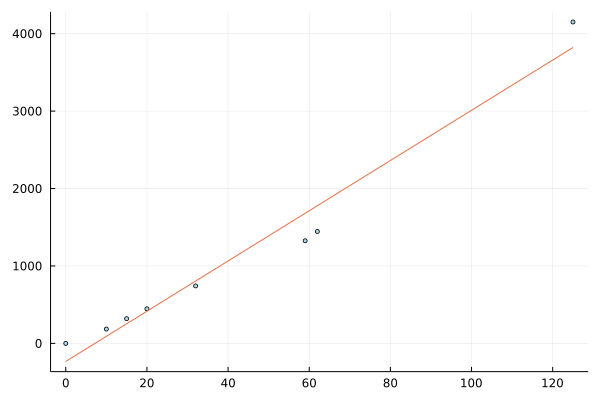

In [99]:
#EXERCICIO 2(C)
#Recebe o grau do polinomio desejado
function polinomio(grau)
    #Cria a matriz de vandermode
    V = vandermonde(x,y,grau)
    #Realiza a regressão
    a = V\y
    #Monta a função 
    f(x) =sum(a[i+1]*x^i for i in 0:grau)
    #Retorna a função
    return f
end


scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(polinomio(1))

In [100]:
trapezio(polinomio(1),0,125,1000)

224307.6085907594

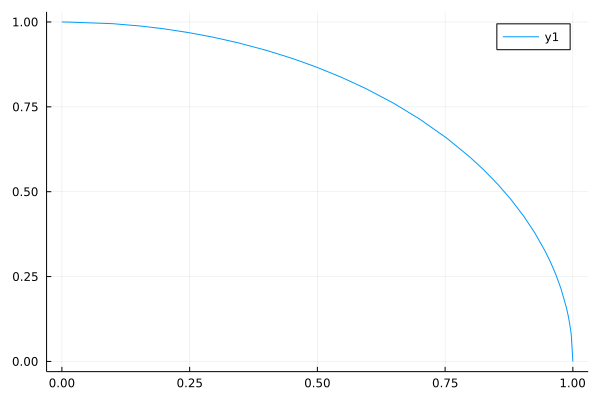

In [104]:
#EXERCICIO 3.(a)
#Função que calcula a integral f(x) num intervalo a até b, passando o valor do intervalo de integração
function trapezio(f,a,b,h) 
    #Pegando o número de intervalos 
    n = (b-a)/h
    #Criando uma variável que irá guardar o valor da integral (area do trapezio)
    S=0.0
    for i=1:(n-1)  #Lopping for que calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    #Calculando as “pontas”
    S=h/2*(S+f(a)+f(b)) 
    #Retorna a área (valor da integral)
    return S
end

l(x) = sqrt(1 - x^2)
plot(l,0,1)

In [105]:
round(4*trapezio(l,0,1,0.1), digits=3)

3.105

In [112]:
#EXERCICIO 4
function Integral_Dupla(h,a,b,c,d) #integral dupla de h(x,y) de a até b no x e de c até d no y
    function g(y)
        f(x)=h(x,y)
        return Integral(f,a(y),b(y))
    end
    return Integral(g,c,d)
end

function Integral(f,a,b)
    return trapezio(f,a,b,1000)
end

#Função que calcula a integral f(x) num intervalo a até b, passando a quantidade de intervalos de integração
function trapezio(f,a,b,n) 
    #Pegando o tamanho de cada intervalo de integração
    h = (b-a)/n
    #Criando uma variável que irá guardar o valor da integral (area do trapezio)
    S=0.0
    for i=1:(n-1)  #Lopping for que calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    #Calculando as “pontas”
    S=h/2*(S+f(a)+f(b)) 
    #Retorna a área (valor da integral)
    return S
end

trapezio (generic function with 1 method)

In [113]:
h(x,y) = x + y
a(y) = y
b(y) = y^2
round(Integral_Dupla(h,a,b,0,1), digits=3)

-0.15